# Task 1

a) h(x) = +1 if x_i > a

A breakpoint is 2.
We cannot get proper division of points $(x_1, +), (x_2, -)$. If for the first point $x_1 > a$ then $x_2 \geq x_1 > a$ $\Rightarrow$ second point should be + too.

It is easy to see that we can get any dichotomy for one point.

VC-dimension = breakpoint - 1 = 1

Growth function: m(n) = n + 1 
(we can get any prefix of sorted by x points to be - and only those dichotomy are possible)

b) h(x) = +1 if a < x_i < b

A breakpoint is 3. We cannot get proper division of points $(x_1, +), (x_2, -), (x_3, +)$. 
Pluses form a consequent segment according to the hypothesis.

VC-dimension = breakpoint - 1 = 2

Growth function: $m(n) = \frac {n(n+1)}{2} + 1$, because  
we can get any consequent subsegment in sorted points to be + and there are $\frac {n(n+1)}{2}$ non-empty segments and $1$ empty.

# Task 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
blobs_data = np.array(pd.read_csv("../Datasets/blobs2.csv"))

In [12]:
def split_data(data):
    training_data = []
    test_data = []
    
    test_size = len(data) * 0.2
    
    training_data.extend(data)
    
    while (len(test_data) < test_size):
        r = np.random.randint(0, len(training_data))
        test_data.append(training_data[r])
        training_data.pop(r)
        
    return (np.array(training_data), np.array(test_data)) 

def divide_xy(data):
    x_data = data[:, 0:-1]
    y_data = data[:, -1]
    return (x_data, y_data)

In [48]:
blobs_train_data, blobs_test_data = split_data(blobs_data)
blobs_train_x, blobs_train_y = divide_xy(blobs_train_data)
blobs_test_x, blobs_test_y = divide_xy(blobs_test_data)
blobs_x, blobs_y = divide_xy(blobs_data)

In [103]:
def sign(x):
    return 1 if x >= 0 else 0

def classify(w, x):
    return sign(np.dot(w, x))

def accuracy(w, xs, ys):
    return np.mean([1 if classify(w, x) == y else 0 for (x, y) in zip(xs, ys)])

def polynomial_features(xs, degree):
    return PolynomialFeatures(degree).fit_transform(xs)

def pocket_perceptron_algorithm(train_x, train_y, test_x, test_y, degree):
    train_x = polynomial_features(train_x, degree)
    test_x = polynomial_features(test_x, degree)
    
    w = np.random.uniform(-1, 1, train_x.shape[1])
    
    best_w = w
    
    iterations = 200
    
    for it in range(iterations):
        bad_ids = []
        
        for i in range(len(train_x)):
            if (classify(w, train_x[i]) != train_y[i]):
                bad_ids.append(i)
                
        if (len(bad_ids) == 0):
            return best_w # perfect division found
        
        id = np.random.choice(bad_ids)
        
        w = w + (1 if train_y[id] == 1 else -1) * train_x[id]
        
        if (accuracy(w, test_x, test_y) > accuracy(best_w, test_x, test_y)):
            best_w = w
            
    return best_w        

In [100]:
def random_color():
    return np.random.rand(3,)

def draw_perceptron(data_x, data_y, w, degree):
    x_min = min([x[0] for x in data_x]) - 1
    x_max = max([x[0] for x in data_x]) + 1
    y_min = min([x[1] for x in data_x]) - 1
    y_max = max([x[1] for x in data_x]) + 1
    
    xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    
    zs = xs.copy()
    
    for i in range(xs.shape[0]):
        for j in range(xs.shape[1]):
            p = np.array([xs[i][j], ys[i][j]])
            p = polynomial_features(np.array([p]), degree)[0]
            zs[i][j] = classify(w, p)
    
    plt.contourf(xs, ys, zs, colors=[random_color(), random_color(), random_color(), random_color()])
    
    for t in [0, 1]:
        xs = []
        ys = []
        
        
        xs_support = []
        ys_support = []
        
        for i in range(len(data_y)):
            if (data_y[i] == t):
                xs.append(data_x[i][0])
                ys.append(data_x[i][1])
        
        plt.plot(xs, ys, marker='o', color=np.random.rand(3,), ls='')
    
    plt.show()
    
    plt.close()

In [101]:
def accuracy_with_degree(w, xs, ys, degree):
    xs = polynomial_features(xs, degree)
    return accuracy(w, xs, ys)

def show_perceptron_for_degree(degree):
    w = pocket_perceptron_algorithm(blobs_train_x, blobs_train_y, blobs_test_x, blobs_test_y, degree)
    print("Data accuracy: " + str(accuracy_with_degree(w, blobs_x, blobs_y, degree)))
    print("Train accuracy: " + str(accuracy_with_degree(w, blobs_train_x, blobs_train_y, degree)))
    print("Test accuracy: " + str(accuracy_with_degree(w, blobs_test_x, blobs_test_y, degree)))
    draw_perceptron(blobs_x, blobs_y, w, degree)

Data accuracy: 0.98
Train accuracy: 0.985
Test accuracy: 0.96


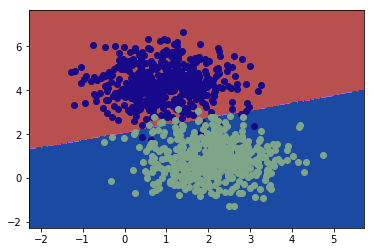

In [122]:
show_perceptron_for_degree(1)

# Task 3

Data accuracy: 0.979
Train accuracy: 0.98375
Test accuracy: 0.96


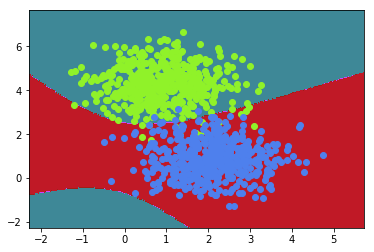

In [104]:
show_perceptron_for_degree(2)

Data accuracy: 0.982
Train accuracy: 0.98625
Test accuracy: 0.965


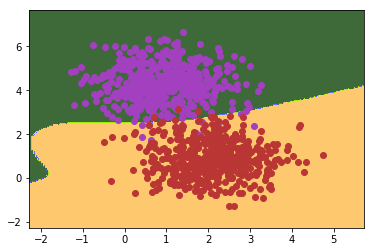

In [93]:
show_perceptron_for_degree(3)

Data accuracy: 0.977
Train accuracy: 0.98125
Test accuracy: 0.96


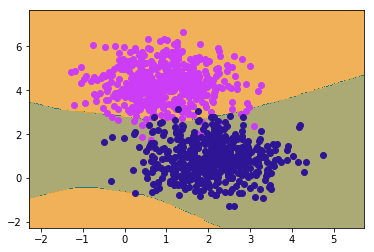

In [94]:
show_perceptron_for_degree(4)

The best accuracy is for degree 3. 

# Task 4

In [144]:
spam_data = np.array(pd.read_csv("../Datasets/spam.csv"))

cancer_data = np.array(pd.read_csv("../Datasets/cancer.csv"))

for i in range(len(cancer_data)):
    label = cancer_data[i][0]
    for j in range(1, len(cancer_data[i])):
        cancer_data[i][j - 1] = cancer_data[i][j]
    cancer_data[i][-1] = 0 if (label == 'B') else 1

In [191]:
def scale_min_max(data):
    data = data.copy()
    features = data.shape[1]
    
    for j in range(features):
        mn = min([data[i][j] for i in range(len(data))])
        mx = max([data[i][j] for i in range(len(data))])
        for i in range(len(data)):
            data[i][j] = (data[i][j] - mn) / (mx - mn)
    return data

def fix_y(y):
    for i in range(len(y)):
        if (y[i] == 0):
            y[i] = -1
    return y        

In [192]:
spam_x, spam_y = divide_xy(spam_data)
cancer_x, cancer_y = divide_xy(cancer_data)

spam_x = scale_min_max(spam_x)
cancer_x = scale_min_max(cancer_x)

spam_y = fix_y(spam_y)
cancer_y = fix_y(cancer_y)

In [202]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def logistic_gradient(x, y, w):
    return -y * x / (1 + np.exp(y * np.dot(w, x)))

def logistic_classify(x, w):
    return 1 if (sigmoid(np.dot(w, x)) > 0.5) else -1

def logistic_regression_accuracy(data_x, data_y, w):
    return np.mean([1 if (logistic_classify(x, w) == y) else 0 for (x, y) in zip(data_x, data_y)])

def logistic_regression(data_x, data_y, iterations=1000):
    batch_size = 50
    alpha = 0.05
    
    data_x = scale_min_max(data_x)
    data_x = polynomial_features(data_x, 1)
    
    w = np.random.uniform(-1, 1, data_x.shape[1])
    result = [logistic_regression_accuracy(data_x, data_y, w)]
    
    for it in range(iterations):
        gradient = np.array([0 for i in range(len(w))])
        for i in range(batch_size):
            id = np.random.randint(0, len(data_x))
            gradient = gradient + logistic_gradient(data_x[id], data_y[id], w)
        gradient = gradient / batch_size
        w = w - alpha * gradient
        result.append(logistic_regression_accuracy(data_x, data_y, w))
    return result

In [203]:
def draw_accuracy_curve(ys):
    plt.plot(range(0, len(ys)), ys)
    plt.xlabel("iteration")
    plt.ylabel("accuracy")
    plt.show()
    plt.close()

Cancer dataset


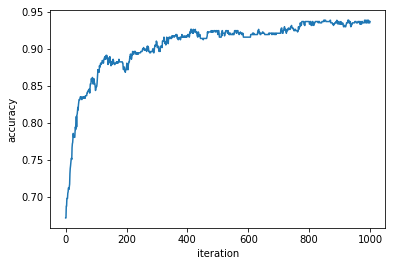

In [206]:
print("Cancer dataset")
draw_accuracy_curve(logistic_regression(cancer_x, cancer_y))

Spam dataset


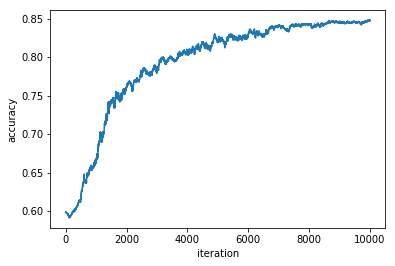

In [207]:
print("Spam dataset")
draw_accuracy_curve(logistic_regression(spam_x, spam_y, 10000))

# Task 5

In [5]:
image_size = 28 # width = height

def load_mnist_data():
    data = np.array(pd.read_csv("../Datasets/mnist.csv"))
    data_y = data[:,0]
    data = data[:,1:]
    data_x = np.zeros((len(data), image_size, image_size))
    
    for i in range(len(data)):
        for j in range(image_size):
            for k in range(image_size):
                data_x[i][j][k] = data[i][j * 28 + k]
    
    return (data_x, data_y)
    
mnist_data_x, mnist_data_y = load_mnist_data()    

Data size: 10000
Label: 0


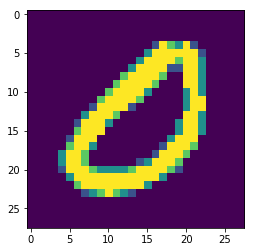

In [399]:
print("Data size: " + str(len(mnist_data_x)))
id = np.random.randint(0, len(mnist_data_x))
print("Label: " + str(mnist_data_y[id]))
plt.imshow(mnist_data_x[id])      

In [20]:
import os
import cv2

def load_not_mnist_data():
    not_mnist_path = "../Datasets/notMNIST_small"
    
    data_x = []
    data_y = []
    
    files = []
    
    for y in os.listdir(not_mnist_path):
        for (directory, _, inner_files) in os.walk(os.path.join(not_mnist_path, y)):
            files.extend([os.path.join(directory, file) for file in inner_files])
            data_y.extend([y for i in range(len(inner_files))])
    for i in range(len(files)):
        data_x.append(cv2.imread(files[i], cv2.IMREAD_GRAYSCALE))
    
    to_delete = []
        
    s = set()    
        
    for i in range(len(data_x)):
        if (data_x[i] is None or len(data_x[i]) == 0):
            to_delete.append(i)
    
    to_delete.reverse()
    for id in to_delete:
        data_x.pop(id)
        data_y.pop(id)
        
    return (np.array(data_x), np.array(data_y))  

not_mnist_data_x, not_mnist_data_y = load_not_mnist_data()  

Data size: 18724
Label: G


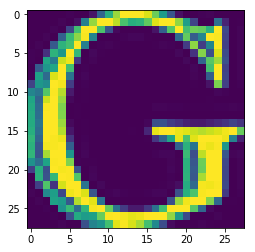

In [282]:
print("Data size: " + str(len(not_mnist_data_x)))
id = np.random.randint(0, len(not_mnist_data_x))
print("Label: " + str(not_mnist_data_y[id]))
plt.imshow(not_mnist_data_x[id])   

# Task 6

In [8]:
import keras

epochs = 5
classes = 10
batch_size = 100

Using TensorFlow backend.


Standard scaling for better performance.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def scale_data(data_x):
    shapes = data_x.shape
    data_x = data_x.astype('float64')
    data_x = data_x.reshape((data_x.shape[0], image_size * image_size))
    x_scale = MinMaxScaler()
    result = x_scale.fit_transform(data_x)
    return result.reshape(shapes)
    
def split_train_test(data_x, data_y):
    train_data_x = [] 
    train_data_y = []
    train_data_x.extend(data_x)
    train_data_y.extend(data_y)
    
    test_proportion = 0.2
    test_size = int(len(train_data_x) * test_proportion)
    
    test_data_x = []
    test_data_y = []
    
    for i in range(test_size):
        id = np.random.randint(0, len(train_data_x))
        test_data_x.append(train_data_x[id])
        test_data_y.append(train_data_y[id])
        train_data_x.pop(id)
        train_data_y.pop(id)
        
    return (np.array(train_data_x), np.array(train_data_y), np.array(test_data_x), np.array(test_data_y))

In [21]:
mnist_data_x = scale_data(mnist_data_x)
not_mnist_data_x = scale_data(not_mnist_data_x)

cat_mnist_data_y = keras.utils.to_categorical(mnist_data_y, classes)
cat_not_mnist_data_y = not_mnist_data_y.copy()
for i in range(len(cat_not_mnist_data_y)):
    cat_not_mnist_data_y[i] = ord(cat_not_mnist_data_y[i]) - ord('A')
cat_not_mnist_data_y = keras.utils.to_categorical(cat_not_mnist_data_y, classes)

In [22]:
mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y = split_train_test(mnist_data_x, cat_mnist_data_y)
not_mnist_train_x, not_mnist_train_y, not_mnist_test_x, not_mnist_test_y = \
    split_train_test(not_mnist_data_x, cat_not_mnist_data_y)

In [12]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

input_shape = (image_size, image_size, 1)

def train_model(train_x, train_y, activation):
    train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle= True)
    
    train_x = train_x.reshape(train_x.shape[0], image_size, image_size, 1)
    valid_x = valid_x.reshape(valid_x.shape[0], image_size, image_size, 1)
    
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation=activation))
    model.add(Conv2D(8, (3, 3), activation=activation))
    model.add(Conv2D(8, (3, 3), activation=activation))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(
        loss=keras.losses.categorical_crossentropy, 
        optimizer=keras.optimizers.Adadelta(),
        metrics=['accuracy']
    )
    
    model.fit(
        x=train_x, y=train_y,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(valid_x, valid_y)
    )
    return model

In [485]:
mnist_test_x = mnist_test_x.reshape(mnist_test_x.shape[0], image_size, image_size, 1)
for activation in ['relu', 'tanh', 'sigmoid']:
    model = train_model(mnist_train_x, mnist_train_y, activation)
    print("For activation = " + str(activation) + ":")
    print("Test accuracy: " + str(model.evaluate(mnist_test_x, mnist_test_y, verbose=0)[1]))

For activation = relu:
Test accuracy: 0.9615
For activation = tanh:
Test accuracy: 0.947
For activation = sigmoid:
Test accuracy: 0.1025


Model doesn't learn with sigmoid activation function for some reason.

In [99]:
def train_model_fixed(train_x, train_y, activation):
    train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle= True)
    
    train_x = train_x.reshape(train_x.shape[0], image_size, image_size, 1)
    valid_x = valid_x.reshape(valid_x.shape[0], image_size, image_size, 1)
    
    model = Sequential()
    #model.add(Conv2D(8, (3, 3), activation=activation))
    #model.add(Conv2D(8, (3, 3), activation=activation))
    model.add(Conv2D(8, (3, 3), activation=activation))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(
        loss=keras.losses.categorical_crossentropy, 
        optimizer=keras.optimizers.Adadelta(),
        metrics=['accuracy']
    )
    
    model.fit(
        x=train_x, y=train_y,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(valid_x, valid_y)
    )
    return model

mnist_test_x = mnist_test_x.reshape(mnist_test_x.shape[0], image_size, image_size, 1)
activation = 'sigmoid'
model = train_model_fixed(mnist_train_x, mnist_train_y, activation)
print("For activation = " + str(activation) + ":")
print("Test accuracy: " + str(model.evaluate(mnist_test_x, mnist_test_y, verbose=0)[1]))

For activation = sigmoid:
Test accuracy: 0.7875


Model with sigmoid function learns only when there are one or zero convolutional layers.

# Task 7

In [487]:
epochs = 2
not_mnist_test_x = not_mnist_test_x.reshape(not_mnist_test_x.shape[0], image_size, image_size, 1)
model = train_model(not_mnist_train_x, not_mnist_train_y, 'relu')
print("Test accuracy: " + str(model.evaluate(not_mnist_test_x, not_mnist_test_y, verbose=0)[1]))

Test accuracy: 0.9043803418803419


Got accuracy $\geq 0.9$ after the second epoch.

# Task 8

In [23]:
def randomly_shifted(arr):
    result = arr.copy()
    
    dx = np.random.randint(-3, 4)
    dy = np.random.randint(-3, 4)
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            ni = i + dx
            nj = j + dy
            
            if (0 > ni or ni >= arr.shape[0]):
                continue
            if (0 > nj or nj >= arr.shape[1]):
                continue
            result[i][j] = arr[ni][nj]
    return result
    
def get_sample(data_x, data_y, proportion):
    size = int(len(data_x) * proportion)
    result_x = []
    result_y = []
        
    ids = np.arange(0, len(data_x))
    np.random.shuffle(ids)
    
    data_x = data_x.reshape(len(data_x), image_size, image_size)
    
    for i in range(size):
        result_x.append(randomly_shifted(data_x[ids[i]]))
        result_y.append(data_y[ids[i]])
    
    return (np.array(result_x).reshape(len(result_x), image_size, image_size, 1), np.array(result_y))

In [41]:
def train_model(train_x, train_y, activation):    
    train_x = train_x.copy()
    train_x = train_x.reshape(train_x.shape[0], image_size, image_size, 1)
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(
        loss=keras.losses.categorical_crossentropy, 
        optimizer=keras.optimizers.Adadelta(),
        metrics=['accuracy']
    )
    
    for i in range(iterations):
        data_x, data_y = get_sample(train_x, train_y, 0.8)
        model.fit(
            x=data_x, 
            y=data_y,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1
        )
       
    return model

In [42]:
epochs = 1
iterations = 35
batch_size = 100
not_mnist_test_x = not_mnist_test_x.reshape(not_mnist_test_x.shape[0], image_size, image_size, 1)
model = train_model(not_mnist_train_x, not_mnist_train_y, 'relu')
print("Test accuracy: " + str(model.evaluate(not_mnist_test_x, not_mnist_test_y, verbose=0)[1]))

Epoch 1/1
11984/11984 [==============================] - 13s 1ms/step - loss: 0.9925 - acc: 0.6980
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.5257 - acc: 0.8501
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.4599 - acc: 0.8648
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.4072 - acc: 0.8843
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.3599 - acc: 0.8926
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.3466 - acc: 0.8980
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.3252 - acc: 0.9056
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.3127 - acc: 0.9060
Epoch 1/1
11984/11984 [==============================] - 12s 1ms/step - loss: 0.2968 - acc: 0.9112
Epoch 1/1
11984/11984 [==============================] - 13s 1ms/step - loss: 0.2924 - acc: 0.9113
Epoch 1/1


To achieve accuracy $\geq 0.95$ I've:
* added dropout layers to prevent overfitting,
* added max pooling.
* generated many samples of dataset with different random shifts of images (the most important optimization).

I also tried to use the same technique as in random forest, but it didn't increase accuracy.  
I tried to add random noise, but didn't notice any effect.